In [6]:
from lib.gen_data import get_ffjord_data, get_toy_names
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
# print available toy data names
toy_names = get_toy_names()
print(toy_names)

['8gaussians', 'swissroll', 'circles', 'rings', 'moons', 'pinwheel', '2spirals', 'checkerboard', 'line', 'cos']


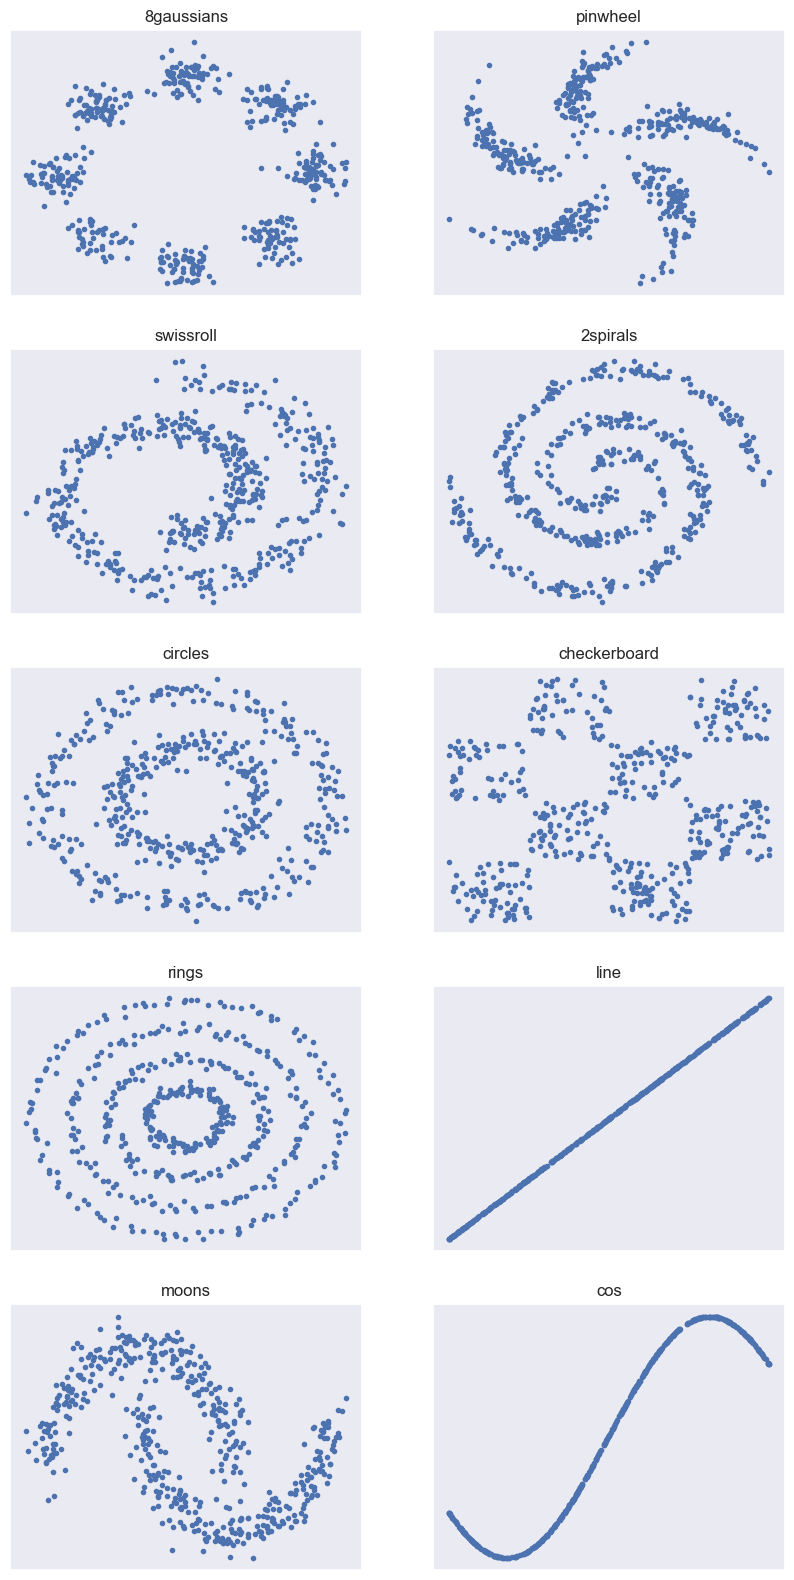

In [36]:
N = len(toy_names)
N_ = int(N/2)
f, ax = plt.subplots(N_, 2, figsize=(10, 20))
for i in range(N):
    # generate data
    name = toy_names[i]
    data = get_ffjord_data(name, 500)

    # plot data
    axi = ax[i%N_, int(i/N_)]
    axi.set_title(name)
    axi.get_xaxis().set_visible(False)
    axi.get_yaxis().set_visible(False)
    axi.plot(data[:, 0], data[:, 1], '.')
plt.show()